**Importing Necessary Libraries**

In [1]:
# Data Analysis Libraries
import numpy as np
import pandas as pd

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
from wordcloud import WordCloud

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

**Exploring Fake News Dataset**

In [3]:
fake=pd.read_csv('Fake.csv')
fake.head(25)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
fake.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [5]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

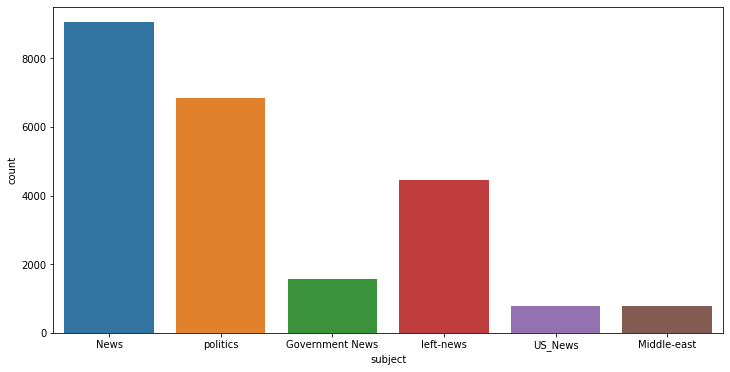

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(x='subject',data=fake)

In [7]:
text=''.join(fake['text'].tolist())

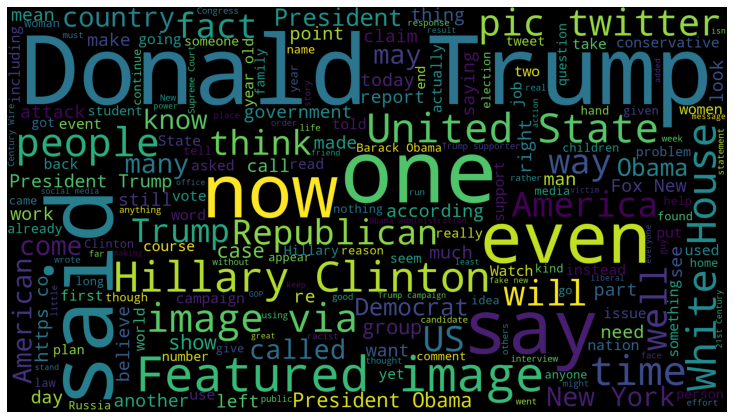

In [8]:
wordcloud=WordCloud(width=1920, height=1080).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Exploring Real News Dataset**

In [9]:
real=pd.read_csv('True.csv')

In [10]:
real['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [11]:
text=''.join(real['text'].tolist())

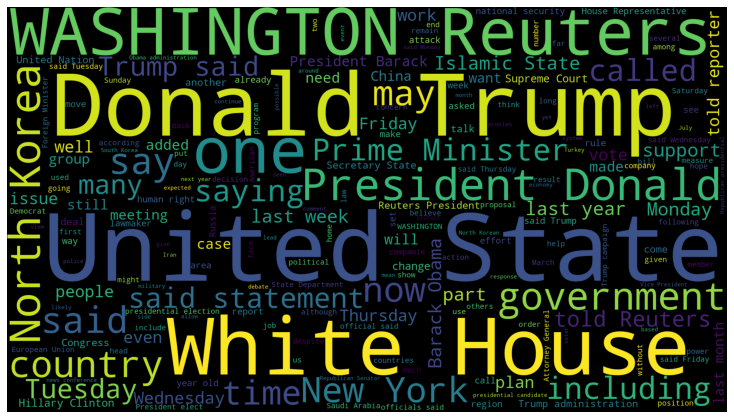

In [12]:
wordcloud=WordCloud(width=1920, height=1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [13]:
real.sample(6)

,title,text,subject,date
5995,Trump wants border tax to pay for wall with Me...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"January 26, 2017"
13227,Irish foreign minister says Brexit border brea...,DUBLIN (Reuters) - No agreement has yet been r...,worldnews,"December 4, 2017"
7677,Russia's Putin says Obama administration does ...,"KRASNAYA POLYANA, Russia (Reuters) - Russian P...",politicsNews,"October 27, 2016"
8557,Senior Democratic National Committee officials...,NEW YORK/WASHINGTON (Reuters) - Three senior o...,politicsNews,"August 2, 2016"
9822,Virginia governor signs order restoring voting...,"RICHMOND, Va. (Reuters) - Virginia Governor Te...",politicsNews,"April 22, 2016"
8212,Obama to meet U.S. Congress leaders Monday on ...,WASHINGTON (Reuters) - U.S. President Barack O...,politicsNews,"September 9, 2016"


In [14]:
unknown_publishers=[]
for index , row in enumerate(real.text.values):
  try:
    record= row.split('-',maxsplit=1)
    record[1]
    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [15]:
len(unknown_publishers)

222

In [16]:
publisher=[]
tmp_text=[]

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
   tmp_text.append(row)
   publisher.append('Unknown')
  else:
   record=row.split('-',maxsplit=1)  
   publisher.append(record[0].strip())
   tmp_text.append(record[1].strip())

In [17]:
real['publisher']=publisher
real['text']=tmp_text

In [18]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [19]:
empty_fake_index=[index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [20]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [21]:
real['text']=real['title']+" "+real['text']
fake['text']=fake['title']+" "+fake['text']     

In [22]:
real['text']=real['text'].apply(lambda x: str(x).lower())
fake['text']=fake['text'].apply(lambda x: str(x).lower())

In [23]:
real['class']=1
fake['class']=0

In [24]:
real=real[['text','class']]

In [25]:
fake=fake[['text','class']]

In [26]:
data=real.append(fake,ignore_index=True)

**Installing and Importing KGP-Talkies**

In [27]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

     |████████████████████████████████| 10.4 MB 3.7 MB/s 
     |████████████████████████████████| 2.2 MB 30.7 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 12.0 MB 4.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 115 kB 4.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-m3e8433h
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip

In [28]:
import preprocess_kgptalkie as ps

In [29]:
data['text']=data['text'].apply(lambda x: ps.remove_special_chars(x))

In [30]:
import gensim

In [31]:
y=data['class'].values

In [32]:
X=[d.split() for d in data['text'].tolist()]


**Converting Word to Vector**

In [ ]:
DIM=100
w2v_model=gensim.models.Word2Vec(sentences=X, size=DIM, window=10,min_count=1)

In [ ]:
w2v_model.wv.most_similar('bangladesh')

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X=tokenizer.texts_to_sequences(X)

In [ ]:
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [ ]:
nos=np.array([len(x) for x in X])
len(nos[nos>1000])

In [ ]:
maxlen=1000
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
len(X[101])

In [ ]:
vocab_size=len(tokenizer.word_index)+1
vocab=tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix=np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i]=model.wv[word]

  return weight_matrix  


In [ ]:
embedding_vectors=get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

**Creating The Model**

In [ ]:
model=Sequential()
model.add(Embedding(vocab_size,output_dim=DIM,weights=[embedding_vectors],input_length=maxlen,trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
model.summary()

**Training and Testing The Model**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [ ]:
model.fit(X_train,y_train,validation_split=0.3,epochs=5)

**News Prediction**

In [ ]:
# x=['Trump Said Some INSANELY Racist Stuff Inside The Oval Office, And Witnesses Back It Up","In the wake of yet another court decision that derailed Donald Trump s plan to bar Muslims from entering the United States, the New York Times published a report on Saturday morning detailing the president s frustration at not getting his way   and how far back that frustration goes.']
x = input("Enter Your News: ")
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen=maxlen)

In [ ]:
if (model.predict(x) >=0.5).astype(int)==0:
 print ('Fake News')
if (model.predict(x) >=0.5).astype(int)==1:
 print ('Real News')